# How to play with root file using Pandas data-frame?

## Load standard and less-standard tools

In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Time profiling
import cProfile
from   timeit import default_timer

# Combinatorics tool
import itertools

# Usual library
import numpy             as np
import pandas            as pd
import matplotlib        as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5


# root_pandas package (https://github.com/scikit-hep/root_pandas)
from root_pandas import read_root

# uproot package (https://github.com/scikit-hep/uproot)
import uproot

# root_numpy (http://scikit-hep.org/root_numpy)
from root_numpy import root2array

# pandas_utils (private tool from https://github.com/mickypaganini/YaleATLAS)
import pandautils as pup


def get_pandas_df_uproot(fileName, treeName):
    tfile = uproot.open(fileName)
    tree  = tfile.get(treeName)
    return tree.pandas.df()

def get_pandas_df_numpy_root(fileName, treeName):
    ar = root2array(fileName, treeName).view(np.recarray)
    return pd.DataFrame(ar)

def test_root_file(loadMethod, fileName, treeName=''):
    df = loadMethod(fileName, treeName)
    if ('jet_pt' in df.columns): 
        print('Vector branches seem to be supported')
    else:
        print('Vector branches doesn\'t seem to be supported')
    return df

Welcome to ROOTaaS 6.06/08


## Compare running time of three options

In [2]:
%timeit -n 1 test_root_file(read_root,'../VectorNtuple_4topSM.root','nominal_Loose')

Vector branches doesn't seem to be supported
Vector branches doesn't seem to be supported
Vector branches doesn't seem to be supported
1 loop, best of 3: 4.01 s per loop


In [4]:
%timeit -n 1 test_root_file(get_pandas_df_uproot,'../VectorNtuple_4topSM.root','nominal_Loose')

Vector branches seem to be supported
Vector branches seem to be supported
Vector branches seem to be supported
1 loop, best of 3: 16.5 s per loop


In [5]:
%timeit -n 1 test_root_file(get_pandas_df_numpy_root, '../VectorNtuple_4topSM.root', 'nominal_Loose')

Vector branches seem to be supported
Vector branches seem to be supported
Vector branches seem to be supported
1 loop, best of 3: 6.74 s per loop


## Simple plotting with the loading data

In [6]:
# Load and print dataset
data = test_root_file(get_pandas_df_numpy_root, '../VectorNtuple_4topSM.root', 'nominal_Loose')
data.head()

Vector branches seem to be supported


,mc_generator_weights,weight_mc,weight_pileup,weight_leptonSF,weight_bTagSF_77,weight_jvt,weight_pileup_UP,weight_pileup_DOWN,weight_leptonSF_EL_SF_Trigger_UP,weight_leptonSF_EL_SF_Trigger_DOWN,...,mu_trigger_SF,mu_trigger_eff_MC,mu_TTVA_SF,jet_isLooseBad,jet_isTightBad,ht,met_sumet,mll,ql1ql2,dPhi_l1l2
0,[1.0],1.0,1.563530,0.964129,0.958315,1.000000,1.866321,0.895397,0.964129,0.964129,...,"[0.820164, 0.996071]","[0.76709, 0.922344]","[0.985203, 0.989439]","[False, False, False, False]","[False, False, False, False]",8.058271e+05,9.914469e+05,154514.625000,0.0,2.746934
1,[1.0],1.0,1.061642,0.990203,0.976377,0.884923,1.263761,0.821935,0.990203,0.990204,...,[1.00043],[0.881565],[0.987979],"[False, False, False, False, False, False, Fal...","[False, True, False, False, False, False, Fals...",1.272003e+06,1.345101e+06,581611.500000,0.0,-2.442687
2,[1.0],1.0,0.846977,0.965472,0.920583,0.979957,0.883613,0.695488,0.965472,0.965472,...,"[0.968401, 0.99557]","[0.875846, 0.874471]","[0.98032, 0.993077]","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",8.980036e+05,9.896339e+05,326389.281250,-2.0,-2.856862
3,[1.0],1.0,0.813727,0.967740,0.954925,0.974365,0.802664,0.711440,0.967751,0.967728,...,[0.992621],[0.889355],[0.987233],"[False, False, False, False]","[False, False, False, False]",6.881434e+05,7.897079e+05,-999.000000,-999.0,-999.000000
4,[1.0],1.0,0.035509,0.939065,0.899858,0.982236,0.034036,0.061250,0.939183,0.938927,...,[],[],[],"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",8.816551e+05,9.624936e+05,122864.117188,0.0,2.366611


In [7]:
# Print more dataset informations
def PrintAllCols(df):
    nmax=np.max( [len(str(w)) for w in data.columns] )
    row_to_print = ('{:>'+str(nmax+5)+'}') * 2
    print(row_to_print.format(*['Feature','dtype']) + '\n')
    for (feature,thistype) in zip(data.columns, data.dtypes):
        print( row_to_print.format(feature, thistype) )

data.info()
PrintAllCols(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Columns: 324 entries, mc_generator_weights to dPhi_l1l2
dtypes: bool(5), float32(73), int32(47), int8(16), object(177), uint32(5), uint64(1)
memory usage: 37.7+ MB
                                            Feature                                              dtype

                               mc_generator_weights                                             object
                                          weight_mc                                            float32
                                      weight_pileup                                            float32
                                    weight_leptonSF                                            float32
                                   weight_bTagSF_77                                            float32
                                         weight_jvt                                            float32
                                   wei

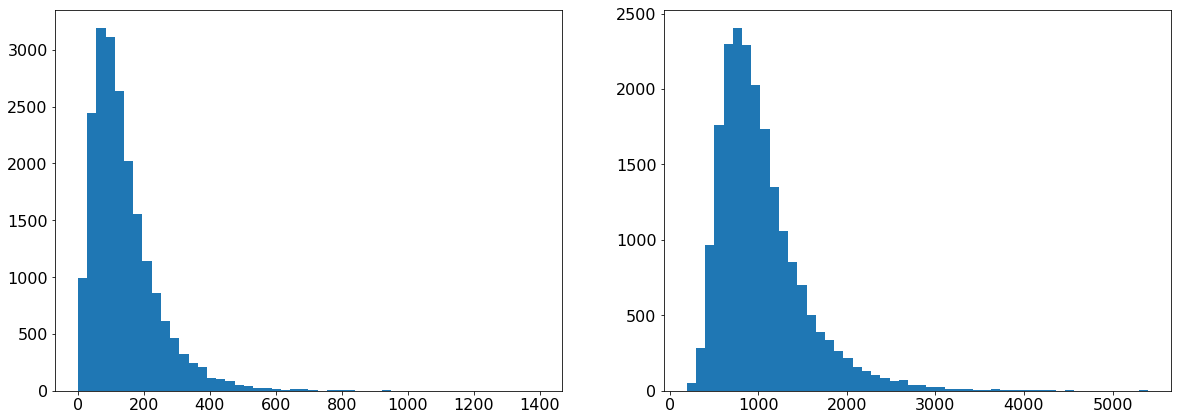

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax = plt.hist(data['met_met']/1000., bins=50)
plt.subplot(1,2,2)
ax = plt.hist(data['ht']/1000., bins=50)

1 loop, best of 3: 8.57 ms per loop
1 loop, best of 3: 9.49 ms per loop


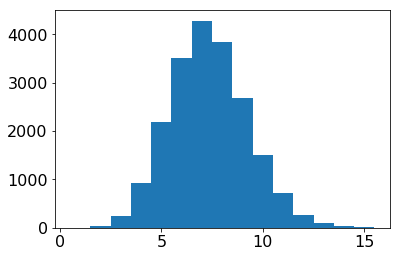

In [9]:
def method1():
    return [len(jet_pt) for jet_pt in data['jet_pt']]

def method2():
    njet_array=[]
    for jet_pt in data['jet_pt']:
        njet_array.append(len(jet_pt))
    return njet_array

%timeit -n 1 method1()
%timeit -n 1 method2()

data['njets'] = method1()
binning = np.linspace(0.5,15.5,16)
ax=plt.hist(data['njets'], bins=binning )

In [10]:
# Get jet 3-vectors
data_3v_jets = data[['jet_pt','jet_eta','jet_phi']]
data_3v_jets.head()

,jet_pt,jet_eta,jet_phi
0,"[289431.0, 150623.0, 88687.3, 63426.2]","[1.11332, -1.41695, 0.618903, 0.207668]","[-1.25585, -1.95538, 1.50781, 0.986456]"
1,"[279632.0, 183484.0, 134012.0, 126458.0, 36996...","[-2.06485, -1.6273, -1.8532, 0.438317, -1.6471...","[-0.341775, 0.173317, -1.62456, 1.68309, -0.40..."
2,"[209873.0, 95353.2, 94082.2, 79370.6, 76964.4,...","[1.41309, 1.36183, 1.81234, -2.22454, 0.425058...","[0.383843, -2.78113, 2.14557, -2.00911, 3.0341..."
3,"[238301.0, 135565.0, 45804.2, 39356.3]","[0.0451698, -0.627116, -0.467155, 0.0775174]","[1.11992, -0.430242, 0.560438, 0.137535]"
4,"[207306.0, 175669.0, 159709.0, 95308.8, 66340....","[-0.866991, -0.142765, -0.319033, -0.852685, -...","[-1.81459, 2.41477, -1.52941, 1.01479, -1.2731..."


## Define classes for objects and adding them to the DataFrame

In [11]:
class Jet(object):
    """
    Jet Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0):
        super(Jet, self).__init__()
        
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m
        
    def __str__(self):
        return 'jet(pT,eta,phi,m)=({:.2f},{:.2f},{:.2f},{:.2f})'.format(self._pt, self._eta, self._phi, self._m)
        
    @property
    def pt(self):
        return self._pt
        
    @property
    def eta(self):
        return self._eta

    @property
    def phi(self):
        return self._phi
        
    @property
    def m(self):
        return self._m
    
    
class Muon(object):
    """
    Muon Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0):
        super(Muon, self).__init__()
        self._pt = pt
        self._eta = eta
        self._phi = phi
        
    def __str__(self):
        return 'mu(pT,eta,phi)=({:.2f},{:.2f},{:.2f})'.format(self._pt, self._eta, self._phi)
        
    @property
    def pt(self):
        return self._pt
        
    @property
    def eta(self):
        return self._eta

    @property
    def phi(self):
        return self._phi

    
class Electron(object):
    """
    Electron Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0):
        super(Electron, self).__init__()
        self._pt = pt
        self._eta = eta
        self._phi = phi
        
    def __str__(self):
        return 'el(pT,eta,phi)=({:.2f},{:.2f},{:.2f})'.format(self._pt, self._eta, self._phi)
        
    @property
    def pt(self):
        return self._pt
        
    @property
    def eta(self):
        return self._eta

    @property
    def phi(self):
        return self._phi

In [12]:
def add_objectCollection(obj,kinem_name,collection_name):
    obj_array = [ obj(pt, eta, phi) for (pt, eta, phi) in zip(
        pup.flatten(data[kinem_name[0]]),
        pup.flatten(data[kinem_name[1]]),
        pup.flatten(data[kinem_name[2]])
    )]
    objects = np.array( pup.match_shape( np.array(obj_array) , data[kinem_name[0]] ) )
    data[collection_name] = objects
    return

# Get a collection of jets from the dataframe information
def addAllCollection():
    add_objectCollection(Jet     ,['jet_pt','jet_eta','jet_phi'],'jetCollection' )
    add_objectCollection(Muon    ,['mu_pt' ,'mu_eta' ,'mu_phi' ],'muonCollection')
    add_objectCollection(Electron,['el_pt' ,'el_eta' ,'el_phi' ],'electronCollection')
    data.head()
    return

%timeit -n 1 addAllCollection()

1 loop, best of 3: 954 ms per loop


## Playing with event-level variable and event selection

### Define dR variable

In [22]:
# Usual dR
def GetdR(jet_pair):
    return np.hypot( jet_pair[0].eta-jet_pair[1].eta, jet_pair[0].phi-jet_pair[1].phi )

# weighted-pT dR computation
def pTweighted_dR(jet1,jet2):
    pt_ave = (jet1.pt + jet2.pt)/2.0
    return pt_ave * GetdR( np.array([jet1,jet2]) )

myjet1 = Jet(pt=12, eta=0.4, phi=-2.1)
myjet2 = Jet(pt=34, eta=0.5, phi=+3.1)
print( str(myjet1) + ' & '+ str(myjet2) )
print( GetdR( np.array([myjet1,myjet2]) ) )
print( pTweighted_dR(myjet1,myjet2) )

jet(pT,eta,phi,m)=(12.00,0.40,-2.10,0.00) & jet(pT,eta,phi,m)=(34.00,0.50,3.10,0.00)
5.20096144958
119.62211334


### Interlude: numpy array, mask and event selection

In [23]:
# interlude: numpy array and selection
x = np.array([5, 2, 3, 1, 4, 5])
mask = x<4
print(x)
print(mask)
print(x[mask])

[5 2 3 1 4 5]
[False  True  True  True False False]
[2 3 1]


### Plot dR distribution after selections

In [24]:
# Now keeps only events for which at exactly 3 leptons are present
data['nlep']  = [len(lep_pt) for lep_pt in data['lep_pt']]

# 1. method based on panda query
selected_jets1 = data.query('nlep==3')['jetCollection']

# 2. method based on numpy-like masks
mask_events = (data['nlep']==3)
all_events_jets = data['jetCollection']
selected_jets2  = all_events_jets[mask_events]

# 3. getting the actual numpy object behing pandas series and apply masks
mask_events_val     = mask_events.values
all_events_jets_val = data['jetCollection'].values
selected_jets2_val  = all_events_jets_val[mask_events_val]

# Comparison of N[selected events]
print('Number of selected events:')
print('method 1: ' + str(len(selected_jets1)) )
print('method 2: ' + str(len(selected_jets2))     + ' -- type:' + str(type(selected_jets2    )) )
print('method 3: ' + str(len(selected_jets2_val)) + ' -- type:' + str(type(selected_jets2_val)) )

Number of selected events:
method 1: 2361
method 2: 2361 -- type:<class 'pandas.core.series.Series'>
method 3: 2361 -- type:<type 'numpy.ndarray'>


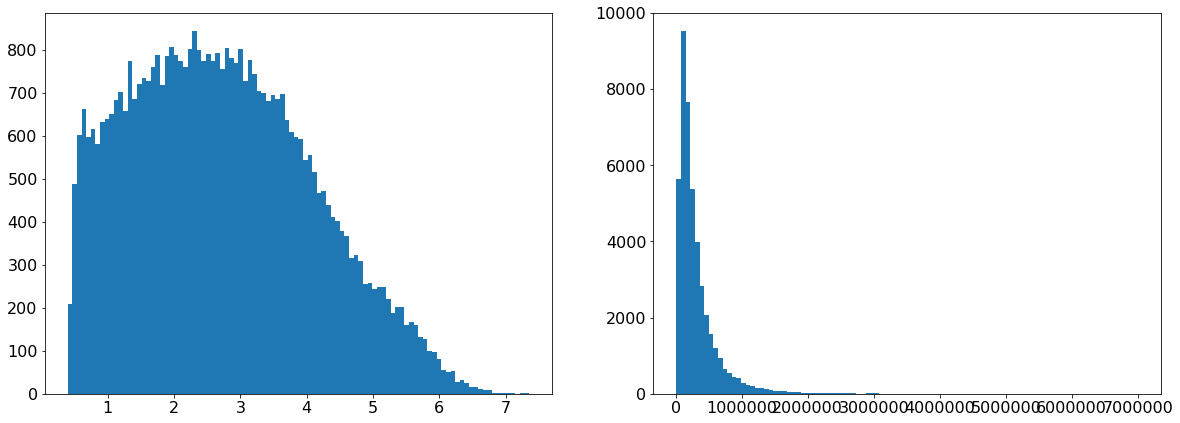

In [30]:
selected_jets = selected_jets1

dR_ptweighted=[]
dR=[]
for jet_collection in selected_jets:
    for j in itertools.combinations(jet_collection,2):
        jet_pair = np.array([j[0],j[1]])
        dR.append( GetdR(jet_pair) )
        dR_ptweighted.append( pTweighted_dR(j[0],j[1]) )

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax = plt.hist(dR,bins=100)
plt.subplot(1,2,2)
ax = plt.hist(dR_ptweighted,bins=100)

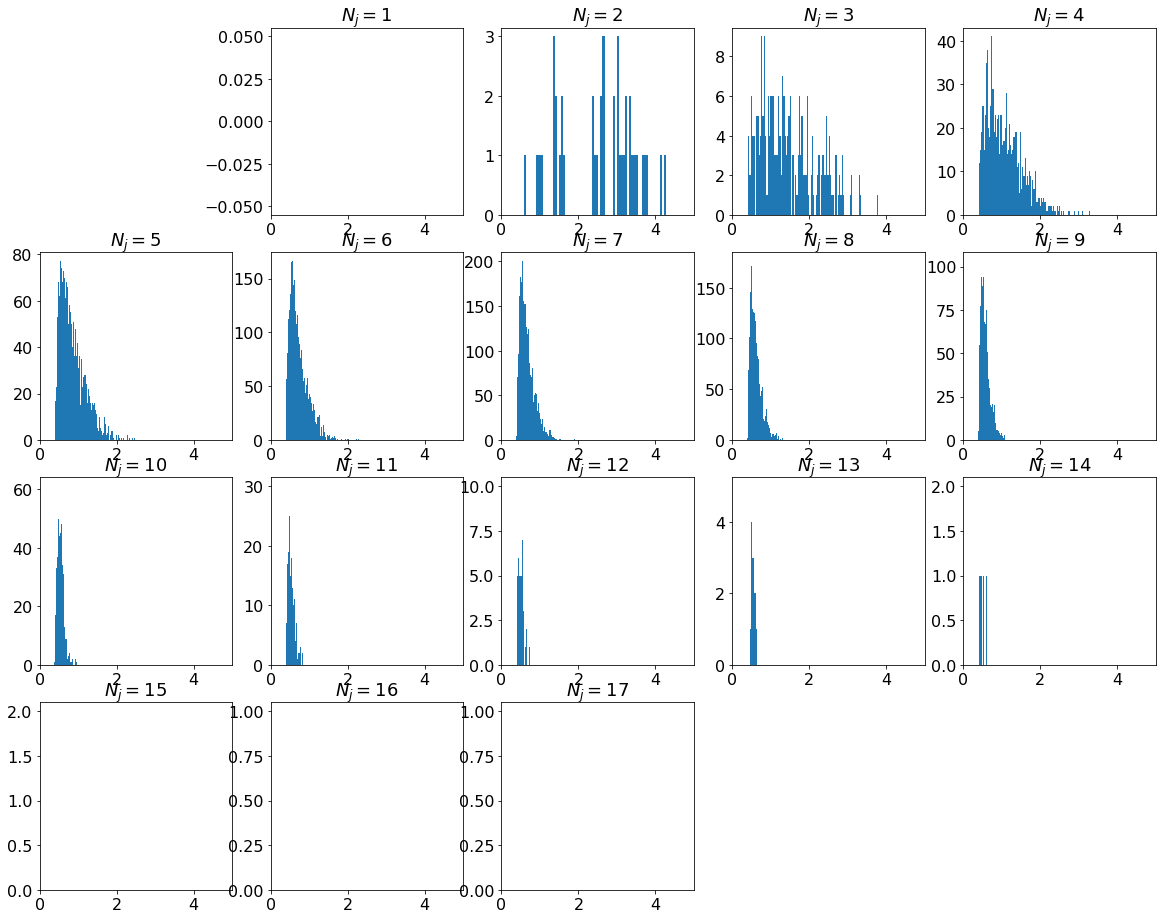

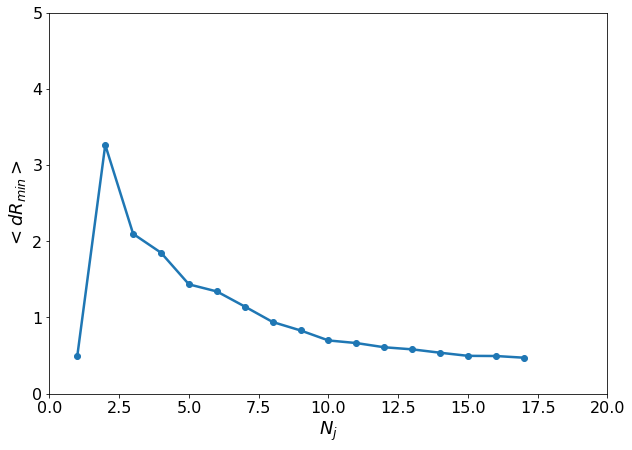

In [31]:
# generalizing to plot min[dRjj] for different njets values
def plot_mindR_over_event(sample):
    dRmin=[]
    for jet_collection in sample['jetCollection']:
        if (len(jet_collection)>1):
            dRmin.append( np.min([GetdR(jpair) for jpair in itertools.combinations(jet_collection,2)]) )
    ax = plt.hist(dRmin,bins=100)    
    return ax


data_per_njets = data.groupby('njets')
plt.figure(figsize=(20,20))
dRmean = {}
for njet,sample in data_per_njets:
    plt.subplot(5,5,njet+1)
    plt.title('$N_{j} = $' + str(njet))
    plt.xlim(0,5)
    ax = plot_mindR_over_event( sample )
    dRmean.update({njet:np.mean(ax[1])})

plt.figure(figsize=(10,7))
plt.xlabel('$N_{j}$')
plt.ylabel('$<dR_{min}>$')
plt.xlim(0,20)
plt.ylim(0,5)
plt.plot(dRmean.keys(),dRmean.values(),'o-')

## Comparing time: explicit loop versus vectioralization

In [32]:
def get_dRmin(jet_collection):
    dRmin=[]
    if (len(jet_collection)>1):
        return np.min([GetdR(jpair) for jpair in itertools.combinations(jet_collection,2)])
    else:
        return -1.

### Vectorialized-method

In [33]:
data_copy = data
%timeit -n 1 data_copy['dRmin'] = data_copy['jetCollection'].apply(get_dRmin)

1 loop, best of 3: 1.33 s per loop


### Explicit loop

In [34]:
dR=[]
t_start = default_timer()
for jet_collection in data['jetCollection']:
    if (len(jet_collection)>1):
        dR.append( np.min([GetdR(jpair) for jpair in itertools.combinations(jet_collection,2)]) )
    else:
        dR.append(-1)

t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

 --> done in 1.44s 



It seems that the vectorialization doesn't help so munch in that case. This might be due the fact that we are using user-defined classes (for instance, Jets) which might not benefits from intrinsic compiled code. The next section compares user-defined classes and flat numbers in order to check this assertion.

## Comparing time: user-defined classes versus arrays of flat numbers

In [52]:
GetdR_vec = np.vectorize(GetdR)

def GetmindR_class(coll1,coll2):
    if (np.array_equal(coll1,coll2)): 
        all_pairs = list(itertools.combinations(coll1,2))
    else:
        all_pairs = list( itertools.product(coll1,coll2) )
    if(len(all_pairs)>0):
        return np.min( GetdR_vec(np.array(all_pairs)) )
    else:
        return -1

def GetmindR_flat(arr_eta1, arr_eta2, arr_phi1, arr_phi2):
    if(np.array_equal(arr_eta1,arr_eta2)):
        all_pairs_eta = list(itertools.combinations(arr_eta1,2))
        all_pairs_phi = list(itertools.combinations(arr_phi1,2))
    else:
        all_pairs_eta = list( itertools.product(arr_eta1, arr_eta2) )
        all_pairs_phi = list( itertools.product(arr_phi1, arr_phi2) )
    if (len(all_pairs_eta)>0):
        dR2min= np.min( [np.square(eta1-eta2)+np.square(phi1-phi2) for ((eta1,eta2),(phi1,phi2)) in zip(all_pairs_eta, all_pairs_phi) ] )
        return np.sqrt(dR2min)

In [53]:
t_start = default_timer()
dR_mu_jet  = data.apply(lambda r: GetmindR_class(r['muonCollection']     , r['jetCollection'])     , axis=1 )
dR_jet_jet = data.apply(lambda r: GetmindR_class(r['jetCollection']      , r['jetCollection'])     , axis=1 )
dR_el_jet  = data.apply(lambda r: GetmindR_class(r['electronCollection'] , r['jetCollection'])     , axis=1 )
dR_el_el   = data.apply(lambda r: GetmindR_class(r['electronCollection'] , r['electronCollection']), axis=1 )
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

TypeError: ("'Muon' object does not support indexing", u'occurred at index 0')

In [37]:
t_start = default_timer()
dR_mu_jet  = data.apply(lambda r: GetmindR_flat(r['mu_eta'] , r['jet_eta'], r['mu_phi'] , r['jet_phi']) , axis=1 )
dR_jet_jet = data.apply(lambda r: GetmindR_flat(r['jet_eta'], r['jet_eta'], r['jet_phi'], r['jet_phi']) , axis=1 )
dR_el_jet  = data.apply(lambda r: GetmindR_flat(r['el_eta'] , r['jet_eta'], r['el_phi'] , r['jet_phi']) , axis=1 )
dR_el_el   = data.apply(lambda r: GetmindR_flat(r['el_eta'] , r['el_eta'] , r['el_phi'] , r['el_phi'])  , axis=1 )
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

 --> done in 11.45s 



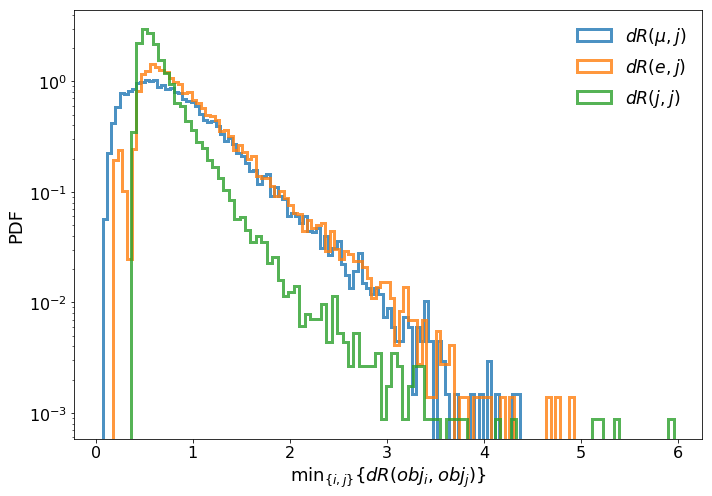

In [38]:
plt.figure(figsize=(10,7))
hist_args = {'bins':100, 'alpha':0.8, 'density':True, 'histtype':'step', 'linewidth':3}
ax=plt.hist(dR_mu_jet[dR_mu_jet>0]  , label='$dR(\mu,j)$', **hist_args)
ax=plt.hist(dR_el_jet[dR_el_jet>0]  , label='$dR(e,j)$'  , **hist_args)
ax=plt.hist(dR_jet_jet[dR_jet_jet>0], label='$dR(j,j)$'  , **hist_args)
plt.xlabel('min$_{\{i,j\}}$$\{dR(obj_i, obj_j)\}$')
plt.ylabel('PDF')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.tight_layout()

## Test of parallelization

### Function definition

In [ ]:
def summed(cols):
    return cols['ht']+cols['met_met']

def compute_manydR_class(c):
    dRmj=GetmindR_class(c['muonCollection']     , c['jetCollection'])
    dRjj=GetmindR_class(c['jetCollection']      , c['jetCollection'])
    dRej=GetmindR_class(c['electronCollection'] , c['jetCollection'])
    dRee=GetmindR_class(c['electronCollection'] , c['electronCollection'])
    return dRmj,dRjj,dRej,dRee

def compute_manydR_flat(c):
    dRmj=GetmindR_flat(c['mu_eta'] , c['jet_eta'], c['mu_phi'] , c['jet_phi'])
    dRjj=GetmindR_flat(c['jet_eta'], c['jet_eta'], c['jet_phi'], c['jet_phi'])
    dRej=GetmindR_flat(c['el_eta'] , c['jet_eta'], c['el_phi'] , c['jet_phi'])
    dRee=GetmindR_flat(c['el_eta'] , c['el_eta'] , c['el_phi'] , c['el_phi'])
    return dRmj,dRjj,dRej,dRee

### First implementation (doesn't work with all argument of apply)

In [ ]:
from multiprocessing import cpu_count, Pool
 
cores = cpu_count() #Number of CPU cores on your system

def parallelize(df, func, partitions):
    data_split = np.array_split(df, partitions)
    pool = Pool(cores)
    df = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    del data_split
    return df

In [ ]:
data1d = data[['ht','met_met','nlep','njets']]

t_start = default_timer()
parallelize(data1d, summed, 8)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

t_start = default_timer()
data1d.apply(summed,axis=1)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

### Second implementation - seems to work for complex function

In [ ]:
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool    = Pool(processes=workers)
    result  = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)] )
    pool.close()
    return pd.concat(list(result))

In [ ]:
data1d = data[['ht','met_met','nlep','njets']]

t_start = default_timer()
apply_by_multiprocessing(data1d, summed, axis=1, workers=8)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

t_start = default_timer()
data1d.apply(summed,axis=1)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
test = apply_by_multiprocessing(data, compute_manydR_class, axis=1, workers=8)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
test = data.apply( compute_manydR_class, axis=1)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
test = apply_by_multiprocessing(data, compute_manydR_flat, axis=1, workers=8)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
test = data.apply( compute_manydR_flat, axis=1)
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
cProfile.run( 'data.apply( compute_manydR_flat, axis=1)' )
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )

In [ ]:
t_start = default_timer()
cProfile.run( 'apply_by_multiprocessing(data, compute_manydR_flat, axis=1, workers=8)' )
t_stop  = default_timer()
print (' --> done in {:.2f}s \n'.format( t_stop-t_start ) )